# The Report

# Münster: Energy and Greenhouse Gas Balance 1990 – 2021


## Introduction:
Münster, the city of science and learning, Westphalian Peace, the capital city of bicycles, and Germany's Climate Protection Capital. Achieving climate neutrality for the city of Münster is a very big challenge and requires a significant intensification and, above all, acceleration of the activities, measures and processes of all actors in the area of ​​climate protection.

The energy and climate protection assessment of Münster offers insights into the city's energy consumption and related greenhouse gas emissions. It records all sectors, including  transport, households, commerce, and industry. 

This report offers an in-depth analysis on both consumption and emissions, emphasizing their trends over time. Utilizing publicly available datasets from openopendata.stadt-muenster.de and the Python programming language to find out "How can Münster enhance its sustainable urban development strategies, focusing on reducing CO2 emissions and reinforcing renewable energy production?"


## Methods: 
 The analysis will focus on two key aspects: the development of annual CO2 emissions and the status of renewable electricity and heat production. The primary goal is to explore how promoting cleaner energy sources benefits the environment. 

The Work Packages: 
1. Loading the datasets into Pandas dataframe. 

2. Preprocessing: Clean, format, and prepare the dataset for analysis. This includes handling missing values, ensuring data consistency, and structuring the data for further investigation.

3. Integration: Develop a data integration plan to combine the renewable energy production dataset and CO2 emissions development in Münster. 

4. Exploring:  Gain insights into the datasets to understand trends and patterns. Examine the relationships between renewable energy production dataset and CO2 emissions development.  

5. Analysis: Using Machine Learnin, Time-series analysis and other analysis techniques for in-depth insights.  
   
6. Generate insights: Provide recommendations for policymakers and energy planners based on the analysis.  

7. Reporting: summarizing findings and insights from the analyses. Present results in a clear and accessible format. Document the data sources, methodologies, and results. 
 


#### 1. Importing the required libraries and installing dependencies:



In [143]:
#!/usr/bin/env python3.11
# -*- coding: utf-8 -*-
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import os 
from googletrans import Translator
import seaborn as sns



#### 2. Loading the datasets:


In [144]:
#print("Loadin Renewable Energy of the city of Münster in the years 1990-2020 data....")
#download data from here:https://opendata.stadt-muenster.de/sites/default/files/Muenster-Erneuerbare-Energien_2020.xls
renewable_energyـurl = "https://opendata.stadt-muenster.de/sites/default/files/Muenster-Erneuerbare-Energien_2020.xls" # 
renewable_energy = pd.read_excel(renewable_energyـurl, sheet_name=None)
  

#print("Loadin CO2 emissions of the city of Münster in the years 1990-2021 data....")
        #download data from here: https://opendata.stadt-muenster.de/sites/default/files/Muenster-CO2-Emissionen_2021.xls
co2_emissions_url = "https://opendata.stadt-muenster.de/sites/default/files/Muenster-CO2-Emissionen_2021.xls" # 
co2_emissions = pd.read_excel(co2_emissions_url, sheet_name=None) # to add all the three  sheets  into CO2emissions,  because it loads the first one by default.


### Renewable_energy dataset:

Renewable energy, obtained from ever-replenishing resource such as the sun and wind. 

While Non-renewable energy, derived from finite sources like coal and oil that may eventually be depleted.

The renewable_energy dataset contains the data on the production of **electricity** and **heat** through renewable energy resources in years 1990-2020 in the city of Münster. The main sources for renewable energy are:

Photovoltaik which involves converting sunlight into electricity.

<img src="photovoltaik.jpeg" alt="Photovoltaik" width="400"/>

Wind power that harnesses the power of wind to generate electricity through turbines.

<img src="windpark.jpeg" alt="windpark" width="400"/>

Hydropower utilizes the movement of water to generate electricity.

<img src="wasserkraft-hauptbild.jpeg" alt="wasserkraft-hauptbild" width="400"/>

Sewage/landfill gas is the gas byproduct from sewage treatment and landfills.

<img src="landfill.jpeg" alt="landfill" width="400"/>

Biomethan is methane derived from organic materials.

<img src="Biogasanlage.jpeg" alt="Biogasanlage" width="350"/> <img src="biomasse.jpeg" alt="biomasse" width="350"/>

Heat pumps are electrical devices transferring heat between locations.

<img src="heatbump.jpeg" alt="heatbump" width="400"/>

Pellets are compressed wood chips used as a fuel source.

<img src="wood.jpeg" alt="wood" width="400"/>   

Firewood refers to firewood that is cut and prepared in log form.

<img src="firewood.jpeg" alt="firewood" width="400"/>   




## CO2  Emissions dataset:

CO2 emission is the production of carbon dioxide, which is a powerful greenhouse gas. It is produced by the burning of materials that contain carbon, such as wood, coal, diesel or gas.
Huge consumption of these materials means emitting  massive amounts of CO2 which leads to global warming.

The co2_emissions dataset contains insights about the **CO2 emissions** (final energy consumption) of the city of Münster in  years 1990-2021. It is divided into three sheets based on the sector (private households, industry, transport, commercial + other), application (heat, electricity, transport) or by energy source (natural gas, district heating, heating oil, coal, fuel mix, transport, electricity, other).


Now, let us have a close look into the datasets.

#### 3. Preprocessing and Integration: 

Clean, format, and prepare the dataset for analysis. This includes handling missing values, ensuring data consistency, and structuring the data for further investigation. Then, initiate a data integration plan to combine the renewable energy production dataset and CO2 emissions development.

In [145]:
#### The first dataset renewable_energy 

renewable_energy_electricity = pd.read_excel(renewable_energyـurl, sheet_name=0) # the first sheet contains the data that describes the production of *electricity* through renewable energy.
renewable_energy_electricity= renewable_energy_electricity.rename(columns={'Erneuerbare Stromproduktion nach Technologie in (MWh)': 'year'} ) #rename for later merging   

renewable_energy_heat = pd.read_excel(renewable_energyـurl, sheet_name=1) #the second sheet contains the data that describes the production of *heat* through renewable energy.
renewable_energy_heat= renewable_energy_heat.rename(columns={'Erneuerbare Wärmeproduktion nach Technologie in (MWh)': 'year'} ) #rename for later merging   

# merge the data of the renewable_energy_electricity and renewable_energy_heat 
renewable_energy = pd.merge(renewable_energy_electricity, renewable_energy_heat,  on='year' ) #merge the two exel sheets into one datafram.

#rename and translate columns
renewable_energy.rename(columns={
    'year': 'year',
    'Photovoltaik': 'Photovoltaic',
    'Windkraft': 'Wind power',
    'Wasserkraft': 'Hydropower',
    'Biogasanlagen_x': 'Biogas plants in electricity',
    'Klär- / Deponiegas_x': 'Sewage / landfill gas in electricity',
    'Biomethan_x': 'Biomethane in electricity',
    'Gesamt EE': 'Total in electricity',
    'Solarthermie': 'Solar thermal',
    'Wärmepumpen': 'Heat pumps',
    'Pellets': 'Pellets',
    'Stückholz': 'Firewood',
    'Biogasanlagen_y': 'Biogas plants in heat',
    'Klär- / Deponiegas_y': 'Sewage / landfill gas in heat',
    'Biomethan_y': 'Biomethane in heat',
    'Gesamt': 'Total in heat',
}, inplace=True)

#Cleaning data and replacing missing values
renewable_energy.fillna(0, inplace=True)

######################################### 



In [146]:
renewable_energy.head(15)

,year,Photovoltaic,Wind power,Hydropower,Biogas plants in electricity,Sewage / landfill gas in electricity,Biomethane in electricity,Total in electricity,Solar thermal,Heat pumps,Pellets,Firewood,Biogas plants in heat,Sewage / landfill gas in heat,Biomethane in heat,Total in heat
0,1990,0.00000,63.20,239.8,0.0,0.00,0,303.00000,24.840,42.96875,0.0,0.0,0.000,0.00,0,67.80875
1,1995,28.01120,63.20,239.8,0.0,0.00,0,331.01120,349.140,195.31250,0.0,0.0,0.000,0.00,0,544.45250
2,2000,482.53884,63.20,239.8,0.0,11850.00,0,12635.53884,1852.420,347.65625,12.5,0.0,0.000,15000.00,0,17212.57625
3,2005,2637.63906,21804.00,239.8,0.0,11850.00,0,36531.43906,4110.660,500.00000,487.5,495.0,1237.700,15000.00,0,21830.86000
4,2010,16953.45818,22815.20,436.0,16417.4,11850.00,0,68472.05818,8827.300,8277.50000,2712.5,2370.0,14649.420,15000.00,0,51836.72000
5,2015,36430.82880,34406.08,436.0,44952.2,12290.20,14816,143331.30880,10670.060,14890.00000,3812.5,3810.0,37828.736,7570.27,21963,100544.56600
6,2016,37358.18730,34456.64,436.0,44952.2,15708.24,23218,156129.26730,10944.818,15617.00000,3950.0,4033.8,37828.736,10762.24,31864,115000.59400
7,2017,39083.18440,55059.84,436.0,44952.2,15414.22,12059,167004.44440,11078.678,16492.00000,4075.0,4078.8,37828.736,8370.43,19457,101380.64400
8,2018,42910.06126,60545.60,436.0,44952.2,15617.32,20490,184951.18126,11217.598,17531.50000,4212.5,4168.2,37828.736,8043.99,26793,109795.52400
9,2019,47745.49056,60545.60,436.0,44952.2,15617.32,17479,186775.61056,11396.998,18731.50000,4275.0,4641.9,37828.736,7740.00,22673,107287.13400


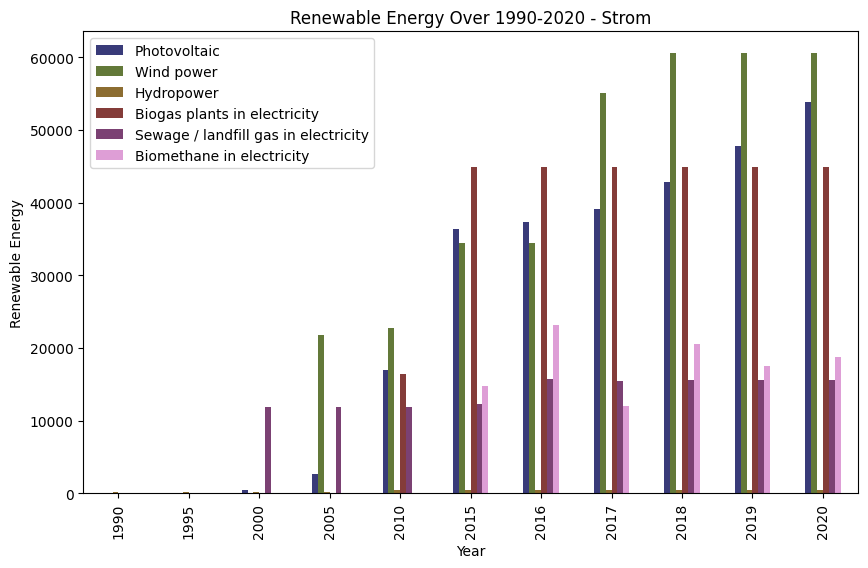

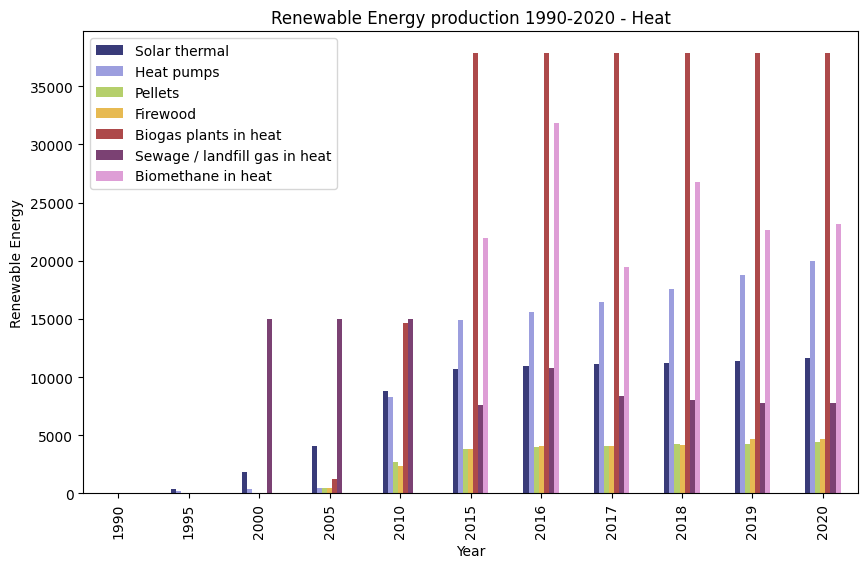

In [147]:

# plot  
renewable_energy.set_index('year', inplace=True)

#  The columns for the first and second pictures
columns_electricity = ['Photovoltaic', 'Wind power', 'Hydropower', 'Biogas plants in electricity',
                      'Sewage / landfill gas in electricity', 'Biomethane in electricity']

columns_heat = ['Solar thermal', 'Heat pumps', 'Pellets', 'Firewood',
                       'Biogas plants in heat', 'Sewage / landfill gas in heat', 'Biomethane in heat']

# Plotting the columns_electricity picture
renewable_energy[columns_electricity].plot(
    kind='bar',
    figsize=(10, 6),
    colormap='tab20b',
    linewidth=7,
    title='Renewable Energy Over 1990-2020 - Strom',
)

# Set labels
plt.xlabel('Year')
plt.ylabel('Renewable Energy')

# Show the first plot
plt.show()

# Plotting the columns_heat picture
renewable_energy[columns_heat].plot(
    kind='bar' ,
    figsize=(10, 6),
    colormap='tab20b',
    linewidth=7,
    title='Renewable Energy production 1990-2020 - Heat',
)

# Set labels
plt.xlabel('Year')
plt.ylabel('Renewable Energy')

# Show the second plot
plt.show()



In [148]:
#### THe second dataset co2 emissions  

 

#store each sheet in a data frame >>>  then creat a new CO2emissions data frame from these data frames (merge them!):
co2_emissions_sectors  = pd.read_excel(co2_emissions_url, sheet_name=0) # the first sheet (at 0) define CO2emissions by sectors
co2_emissions_sectors =co2_emissions_sectors.rename(columns={'CO2-Emissionen nach Sektoren in (t)': 'year'} ) #rename the CO2-Emissionen nach Sektoren column into >>> year. This step for merge the two dataframes alnog the "year" column


co2_emissions_applications = pd.read_excel(co2_emissions_url, sheet_name=1)# the second sheet (at 1) define CO2emissions by application
co2_emissions_applications =co2_emissions_applications.rename(columns={'CO2-Emissionen nach Anwendungen in (kt)': 'year'} ) #rename the CO2-Emissionen nach Anwendungen column into >>> year 

# merge the data of the CO2emissions_sectors and CO2emissions_applications 
co2_emissions = pd.merge(co2_emissions_sectors, co2_emissions_applications,  on='year' ) #merge the two exel sheets into one datafram. cO2_emissions_applications.index.name = 'CO2 emissions according to applications in (KT)' # put the dataset topic in the first(index) column
 # Drop the unnesseciry columns   columns 


### process the merged dataFrame CO2emissions   
co2_emissions.rename(columns={
    'year': 'year',
    'Private Haushalte': 'Private households',
    'Gewerbe + Sonstiges': 'Trade and others',
    'Industrie': 'Industry',
    'Verkehr_x':'Transport',
    'Wärme': 'Heat', # Kt >> convert to t!!
    'Strom': 'Electricity', # Kt!!
    'Gesamt_y': 'Total', # Kt and update to the new values!!
    'Gesamt in % zu 1990': 'Total as of 1990'  # update to the new values!!
     }    ,inplace=True)

co2_emissions = co2_emissions.drop(columns=[col for col in ['Verkehr in %', 'Gesamt_x', 'Wärme in %', 'Strom in %', 'Verkehr_y'] if col in co2_emissions.columns], axis=1)

co2_emissions['Heat']= co2_emissions['Heat']*1000
co2_emissions['Electricity'] = co2_emissions['Electricity']*1000
co2_emissions['Total'] = co2_emissions.iloc[:, 1:-2].sum(axis=1)
co2_emissions['Total as of 1990'] = ((co2_emissions['Total'] - co2_emissions['Total'].iloc[0]) / co2_emissions['Total'].iloc[0]) 


#Cleaning data and replacing missing values
co2_emissions.fillna(0, inplace=True)
#######################################################




In [149]:
co2_emissions.head()

,year,Private households,Trade and others,Industry,Transport,Heat,Electricity,Total,Total as of 1990
0,1990,817146.280496,846374.365518,293939.743986,660748.806226,1.120973e+06,836487.800000,4.575670e+06,0.000000
1,1995,774039.745963,801725.975522,278433.678515,649866.500561,1.055941e+06,798258.216000,4.358265e+06,-0.047513
2,2000,773328.016727,800988.788810,278177.658859,638984.194897,1.058948e+06,793546.832000,4.343973e+06,-0.050637
3,2005,806450.639618,835296.157763,290092.361925,628101.889233,9.614061e+05,970433.036634,4.491780e+06,-0.018334
4,2010,684161.375550,735889.940880,185496.828653,622684.731430,7.880783e+05,817469.875512,3.833781e+06,-0.162138


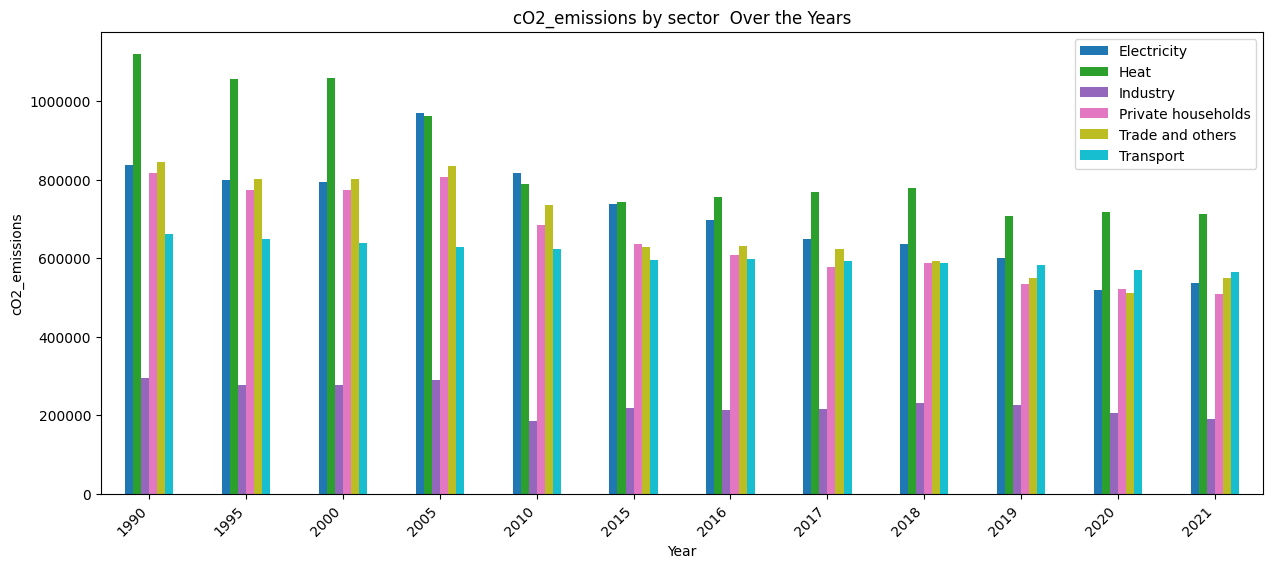

In [150]:
# Plotting
co2_emissions.set_index('year', inplace=True)

cexclude = ['Total',	'Total as of 1990']

co2_emissions.loc[:, co2_emissions.columns.difference(exclude)].plot(
    kind='bar',
    figsize=(15, 6),
    colormap='tab10',
    linewidth=7,
    title='cO2_emissions by sector  Over the Years',
)

# Set labels
plt.xlabel('Year')
plt.xticks(rotation=45, ha='right')  # Adjust the rotation angle and alignment as needed

plt.ylabel('cO2_emissions')
plt.ticklabel_format(axis='y', style='plain')
# Show the plot
plt.show()

In [151]:
#### THe third dataset co2 emissions by energy source

co2_emissions_energy_source = pd.read_excel(co2_emissions_url, sheet_name=2)# the third sheet (at 2) define CO2emissions by energy source

#rename and translate the columns 
column_mapping = {
    'CO2 Emissionen nach Energieträgern und Sektoren in 2021 in (t)':"CO2 Emissions by Energy Source and Sector (2021)",
    'Erdgas': 'Natural Gas',
    'Fernwärme': 'District Heating',
    'Heizöl': 'Heating Oil',
    'EE Wärme': 'Renewable Heat',
    'Kraftstoffmix Verkehr': 'Fuel Mix Traffic',
    'Strom': 'Electricity',
    'Summe': 'Total',
    'Anteil': 'Share'
}
# Rename columns
co2_emissions_energy_source.rename(columns=column_mapping, inplace=True)
co2_emissions_energy_source.set_index('CO2 Emissions by Energy Source and Sector (2021)', inplace=True)

# rename and translate the rows 
index_mapping = {
    'Private Haushalte': 'Private households',
    'Gewerbe+Sonstiges': 'Trade+Other',
    'Industrie': 'Industry',
    'Verkehr': 'Traffic',
    'Summe': 'Total',
    'Anteil': 'Share'
}

# Rename index (rows)
co2_emissions_energy_source.rename(index=index_mapping, inplace=True)


#Cleaning data and replacing missing values
co2_emissions_energy_source.fillna(0, inplace=True)



In [152]:
co2_emissions_energy_source.head(20)

,Natural Gas,District Heating,Heating Oil,Renewable Heat,Fuel Mix Traffic,Electricity,Total,Share
CO2 Emissions by Energy Source and Sector (2021),,,,,,,,
Private households,238981.296226,11415.403694,98807.497200,1052.187099,0.000000,159997.920038,5.102543e+05,0.280946
Trade+Other,120189.234076,85194.803281,36684.480000,348.860810,0.000000,306686.890631,5.491043e+05,0.302337
Industry,107276.177189,0.000000,1630.827765,0.000000,0.000000,82073.433626,1.909804e+05,0.105154
Traffic,0.000000,0.000000,0.000000,0.000000,549780.000000,16082.000000,5.658620e+05,0.311564
Total,466446.707492,96610.206975,137122.804965,1401.047909,549780.000000,564840.244295,1.816201e+06,1
Share,0.256825,0.053194,0.075500,0.000771,0.302709,0.311001,1.000000e+00,-


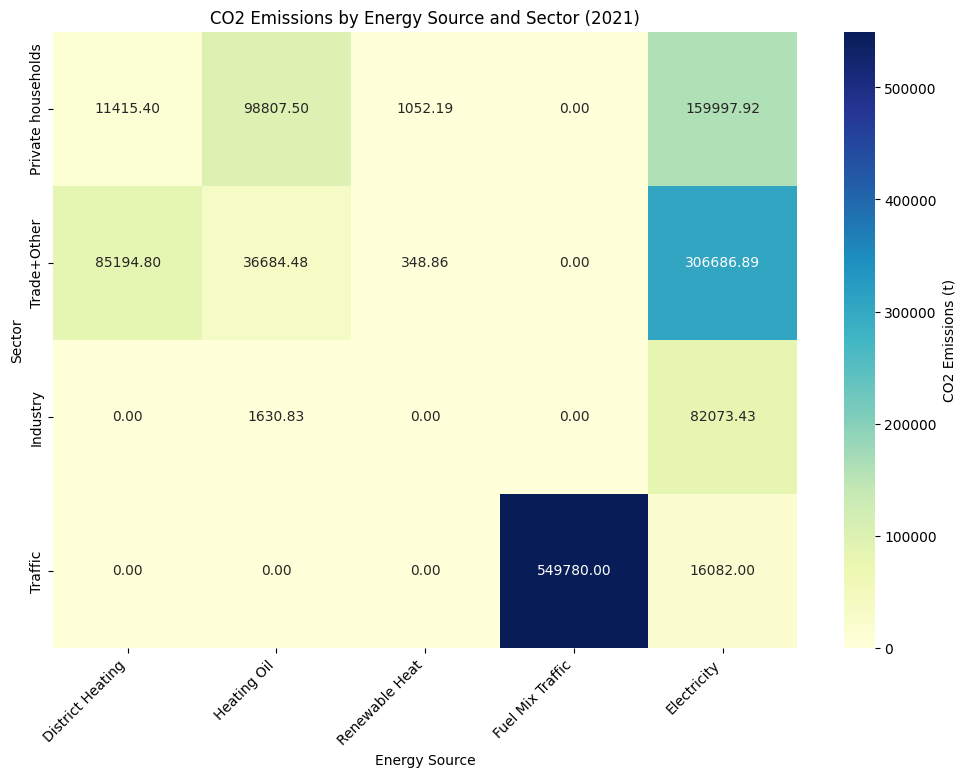

In [153]:

 
# Select relevant rows and columns for the heatmap
data_to_heatmap = co2_emissions_energy_source.iloc[0:4, 1:-2]  # Select rows 0 to 3 and columns 1 to -2 (excluding the last column)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data_to_heatmap, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'CO2 Emissions (t)'})

# Set labels and title
plt.title('CO2 Emissions by Energy Source and Sector (2021)')
plt.xlabel('Energy Source')
plt.xticks(rotation=45, ha='right')  # Adjust the rotation angle and alignment as needed
plt.ylabel('Sector')

# Show the plot
plt.show()


In [154]:
#Creating SQLite files
print("Creating CO2 Emissions Energy and Renewable Energy SQLite files: ")
sqlite_path = '../data/co2_emissions_renewable_energy.sqlite'
engine = create_engine(f'sqlite:///{sqlite_path}')

print("creating CO2 Emissions data table ...")
co2_emissions.to_sql("co2_emissions_table", engine, if_exists='replace', index=False)
   
     
print("creating Renewable Energy data table...")
renewable_energy.to_sql("renewable_energy_table", engine ,if_exists='replace', index=False)

print("creating CO2 Emissions by Energy Source data table...")
co2_emissions_energy_source.to_sql("co2_emissions_energy_source_table", engine ,if_exists='replace', index=True)# index=True

 
    
print("SQLite files created successfully!!!")

Creating CO2 Emissions Energy and Renewable Energy SQLite files: 
creating CO2 Emissions data table ...
creating Renewable Energy data table...
creating CO2 Emissions by Energy Source data table...
SQLite files created successfully!!!


### Refrences: 

* https://www.alt-bau-neu.de/kreis-borken/abnwaermepumpen-29087.asp  

* https://www.swd-ag.de/magazin/wasserkraft/ 

* https://www.stadt-muenster.de/klima/foerderprogramm/photovoltaik

* https://farwick-muehlenbau.de/biogasanlagen-unser-beitrag-zu-erneuerbaren-energien/

* https://www.plenter.ms/shk/heizung/heizsysteme/kamine-oefen/brennstoffe/pellets

* https://www.heizungsbau.net/magazin/scheitholzheizung-20204393 
 
* https://climatefalsesolutions.org/landfill-gas-to-energy/  

* https://www.swd-ag.de/magazin/wasserkraft/   

* https://orsted.de/gruene-energie/energie-lexikon/co2-emissionen

* https://www.energy.gov/eere/renewable-energy

In [155]:
'''
translator = Translator()
def trnslate_dataframe(df):
    df.columns = [translator.translate(col, dest='en').text for col in df.columns]
    
    return df.columns

renewable_energy_translated_columns = [translator.translate(col, dest='en').text for col in renewable_energy.columns]
cO2_emissions_translated_columns = [translator.translate(col, dest='en').text for col in cO2_emissions.columns]
cO2_emissions_energy_source_translated_columns = [translator.translate(col, dest='en').text for col in cO2_emissions_energy_source.columns]


renewable_energy.columns = trnslate_dataframe(renewable_energy)
cO2_emissions.columns =  trnslate_dataframe(cO2_emissions)
cO2_emissions_energy_source.columns = trnslate_dataframe(cO2_emissions_energy_source)


# Function to translate a single cell value
def translate_cell(value):
    if value:
        return translator.translate(value, dest='en').text
    return value

# Googletrans Translator
translator = Translator()

# Apply translation to first solumn 
#for column in cO2_emissions_energy_source.columns:
cO2_emissions_energy_source['CO2 emissions according to energy sources and sectors in 2021 in (t)'] = cO2_emissions_energy_source['CO2 emissions according to energy sources and sectors in 2021 in (t)'].apply(translate_cell)

'''
 
 

"\ntranslator = Translator()\ndef trnslate_dataframe(df):\n    df.columns = [translator.translate(col, dest='en').text for col in df.columns]\n    \n    return df.columns\n\nrenewable_energy_translated_columns = [translator.translate(col, dest='en').text for col in renewable_energy.columns]\ncO2_emissions_translated_columns = [translator.translate(col, dest='en').text for col in cO2_emissions.columns]\ncO2_emissions_energy_source_translated_columns = [translator.translate(col, dest='en').text for col in cO2_emissions_energy_source.columns]\n\n\nrenewable_energy.columns = trnslate_dataframe(renewable_energy)\ncO2_emissions.columns =  trnslate_dataframe(cO2_emissions)\ncO2_emissions_energy_source.columns = trnslate_dataframe(cO2_emissions_energy_source)\n\n\n# Function to translate a single cell value\ndef translate_cell(value):\n    if value:\n        return translator.translate(value, dest='en').text\n    return value\n\n# Googletrans Translator\ntranslator = Translator()\n\n# Apply tr